#### מגישים:

#  מעבדה 4 - כיול מצלמה 

מטרת המעבדה היא חישוב פרמטרי המצלמה הפנימיים על ידי תצלום בודד.בדיקת יציבות הפרמטרים ואת השפעת שינוי עמדת הצילום על ערכם.

### חלק 1 -  בניית שדה כיול ותצלום

 א. תכננו שדה כיול  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Camera import Camera
import PhotoViewer as pv
from SingleImage import SingleImage
import MatrixMethods

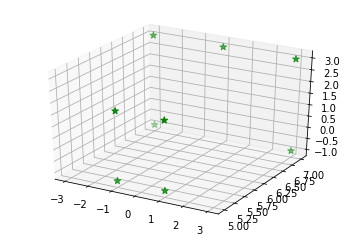

In [2]:
# Clibration field
calibration_field = np.array([[-1, 5, -1],
                              [-1, 5, 2],
                              [1, 5, 2],
                              [1, 5, -1],
                              [3, 7, -1],
                              [3, 7, 3],
                              [0, 7, 3],
                              [-3, 7, 3],
                              [-3, 7, -1]])



# draw
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(calibration_field[:, 0], calibration_field[:, 1], calibration_field[:, 2], c='g', s=50, marker='*')

plt.show()


ב. הסבירו את הבנייה שלכם, התייחסו לנקודות הבאות:
  - מספר ואופן פיזור הנקודות
  - האם השדה הוא מישורי או תלת מימדי

פיזור הנקודות הוא פיזור הקרוב להיות אחיד הנותן כיסוי של כל הפריים.
שדה הכיול צריך להכיל לפחות 6 נקודות מכיוון שיש 11 נעלמים וכל נקודה תורמת 2 משוואות.
בכל מקרה ככל שמספר הנקודות יגדל כך מספר התצפיות יגדל ונוכל לקבל פיתרון טוב יותר. כרגע פיזרנו 10 נקודות.

בחרנו ליצור שדה תלת מיימדי.

ג. הגדירו מערכת מצלמה
  - הגדירו את הפרמטרים הפנימיים של המצלמה כולל עיוותים רדיאליים

In [3]:
focal_length = 35  # [mm]
sensor_size = 35  # [mm]
xp = 0.05  # [mm]
yp = 0.05  # [mm]
k1 = 0.5e-8
k2 = 0.5e-12

camera1 = Camera(focal_length, np.array([xp, yp]),  np.array([k1, k2]), None, None, sensor_size)

ד. הגדירו את התצלום

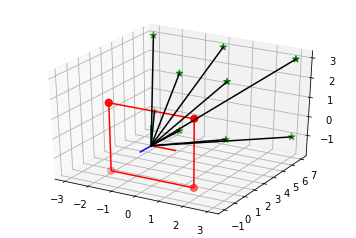

In [4]:
img1 = SingleImage(camera1)
omega = np.radians(90)
phi = 0
kappa = 0
Z = 0  # [m]
img1.exteriorOrientationParameters = np.array([[0, 0, Z, omega, phi, kappa]])


# drawing
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scale = 100
img1.drawSingleImage(calibration_field, scale, ax, 'yes')
ax.scatter(calibration_field[:, 0], calibration_field[:, 1], calibration_field[:, 2], c='g', s=50, marker='*')



ה. האם התצלום שבחרתם הוא אלכסוני/ אופקי/ אנכי?
   - הסבירו את הבחירה שלכם לערכי האוריינטציה החיצונית של התצלום

בחרנו תצלום אופקי המתאים לאופי שדה הכיול שבנינו- הממוקם על חזית

ו.  הסבירו למה האוריינטציה ושדה הכיול שנבחרו מאפשרים כיול למצלמה

ברגע שנקודות שדה הכיול ידועות היטב במערכת העולם וכן נדגמו במערכת המצלמה, ניתן לבצע את תהליך התאום ולקבל את פרמטרי הכיול

ז. ציירו את נקודות הבקרה על גבי התצלום

camera Points= 
 [[ -7.  -7.]
 [ -7.  14.]
 [  7.  14.]
 [  7.  -7.]
 [ 15.  -5.]
 [ 15.  15.]
 [  0.  15.]
 [-15.  15.]
 [-15.  -5.]]
correted points to Principal Point= 
 [[ -7.05  -7.05]
 [ -7.05  13.95]
 [  6.95  13.95]
 [  6.95  -7.05]
 [ 14.95  -5.05]
 [ 14.95  14.95]
 [ -0.05  14.95]
 [-15.05  14.95]
 [-15.05  -5.05]]
corrected points for radial distortion and Principal Point= 
 [[ -7.05000362  -7.05000362]
 [ -7.05000886  13.95001734]
 [  6.95000851  13.95001714]
 [  6.95000341  -7.05000351]
 [ 14.95001894  -5.05000648]
 [ 14.95003455  14.95003455]
 [ -0.05000011  14.95001691]
 [-15.05003551  14.95003504]
 [-15.05001967  -5.05000664]]
image points= 
 [[10.44999638 24.55000362]
 [10.44999114  3.54998266]
 [24.45000851  3.54998286]
 [24.45000341 24.55000351]
 [32.45001894 22.55000648]
 [32.45003455  2.54996545]
 [17.44999989  2.54998309]
 [ 2.44996449  2.54996496]
 [ 2.44998033 22.55000664]]


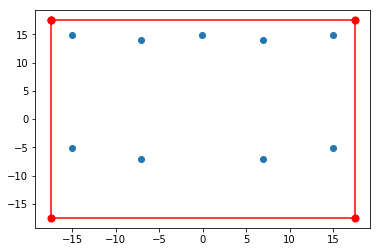

In [5]:
# sampeling points in camera system
cameraPoints1 = img1.GroundToImage(calibration_field)
correted_points1 = camera1.CorrectionToPrincipalPoint(cameraPoints1)
corrected_points2 = camera1.CorrectionToRadialDistortions(correted_points1)
print('camera Points=', '\n', cameraPoints1)
print('correted points to Principal Point=', '\n', correted_points1)
print('corrected points for radial distortion and Principal Point=', '\n', corrected_points2)
plt.figure()
pv.drawImageFrame2D(img1.camera.sensorSize, img1.camera.sensorSize)
plt.scatter(corrected_points2[:, 0], corrected_points2[:, 1])


#image points
img1.innerOrientationParameters = np.array([img1.camera.sensorSize/2,1,0,img1.camera.sensorSize/2,0,-1])
image_points1 = img1.CameraToImage(corrected_points2)
print('image points=', '\n', image_points1)
plt.show()


### חלק 2 -  כיול מצלמה

א. בתוך המחלקה Camera בנו פונקציה בשם Calibration המקבלת את הנקודות בתצלום, נקודות הבקרה בעולם, וערכים מקורבים ומחזירה את פרמטרי הכיול של המצלמה 

א. כיילו את המצלמה בעזרת התצלום שהגדרתם
 -  תהליך הכיול צריך להיות מוצג באופן הדרגתי לפי השלבים שלמדנו שמעבדות קודמות
    - להתחיל מקונפיגורציה פשוטה
    - פתרון לפי מספר נעלמים העולה בצורה הדרגתית
    - פתרון עם מידת רעש שונה

ג. הסבירו את התשובות שקיבלתם בתהליך הכיול שבניתם
  - התתייחסו לדברים הבאים:
    - הבנייה של שדה הכיול
    - אויינטציה של התצלום
    - מספר הנעלמים בתהליך ודיוקם